In [334]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = pd.read_csv('../lol/high_diamond_ranked_10min.csv', sep=',', encoding='CP949')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [335]:
del data['gameId']

In [336]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((6915, 39), (2964, 39))

In [337]:
train_y = df_train['blueWins']
del df_train['blueWins']

In [338]:
test_y = df_test['blueWins']
del df_test['blueWins']

In [339]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((-1, 1))

In [340]:
df_train = sc.fit_transform(df_train)
df_test = sc.transform(df_test)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [341]:
import torch
from torch import nn, optim
from torch.nn import functional as F

In [342]:
df_train.shape

(6915, 38)

In [343]:
df_train = torch.tensor(df_train).float()
df_test = torch.tensor(df_test).float()
train_y = torch.tensor(train_y.values).long()
test_y = torch.tensor(test_y.values).long()

In [344]:
class LolNN(nn.Module):
    def __init__(self):
        super(LolNN, self).__init__()
        self.fc1 = nn.Linear(38, 100)
        self.fc2 = nn.Linear(100, 100)
        #self.fc3 = nn.Linear(100, 100)
        #self.fc4 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        return self.fc3(x)
    

In [345]:
net = LolNN()

In [346]:
optimizer = optim.Adam(net.parameters())
criterion = nn.CrossEntropyLoss()

In [347]:
losses = []

In [348]:
for epoch in range(1, 150):
    optimizer.zero_grad()
    outputs = net(df_train)
    loss = criterion(outputs, train_y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print("Epoch {}, Loss: {}".format(epoch, loss.item()))

Epoch 1, Loss: 0.692271888256
Epoch 2, Loss: 0.684285461903
Epoch 3, Loss: 0.676737546921
Epoch 4, Loss: 0.669408500195
Epoch 5, Loss: 0.662133157253
Epoch 6, Loss: 0.65478682518
Epoch 7, Loss: 0.647283613682
Epoch 8, Loss: 0.639637291431
Epoch 9, Loss: 0.631846725941
Epoch 10, Loss: 0.623905420303
Epoch 11, Loss: 0.615824818611
Epoch 12, Loss: 0.607681572437
Epoch 13, Loss: 0.599607050419
Epoch 14, Loss: 0.591768324375
Epoch 15, Loss: 0.584320604801
Epoch 16, Loss: 0.577336847782
Epoch 17, Loss: 0.570862293243
Epoch 18, Loss: 0.564901888371
Epoch 19, Loss: 0.559427976608
Epoch 20, Loss: 0.554409265518
Epoch 21, Loss: 0.549780011177
Epoch 22, Loss: 0.545467674732
Epoch 23, Loss: 0.541465997696
Epoch 24, Loss: 0.537824511528
Epoch 25, Loss: 0.534657180309
Epoch 26, Loss: 0.532092630863
Epoch 27, Loss: 0.530228197575
Epoch 28, Loss: 0.529064238071
Epoch 29, Loss: 0.528604567051
Epoch 30, Loss: 0.528794527054
Epoch 31, Loss: 0.529431223869
Epoch 32, Loss: 0.530208170414
Epoch 33, Loss: 0.

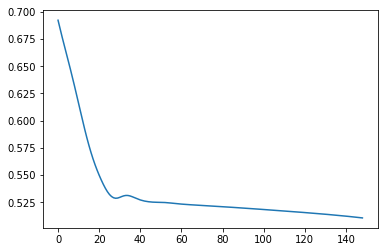

In [349]:
plt.plot(losses)

In [350]:
pred_test = net(df_test)
_, preds_y = torch.max(pred_test, 1)

In [351]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [352]:
accuracy_score(test_y, preds_y)

0.717948717948718